In [1]:
# Store Performance of all models 
PERFORMANCE = []

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("/content/MP2_Data.csv")

**Step 1 - Data Processing**

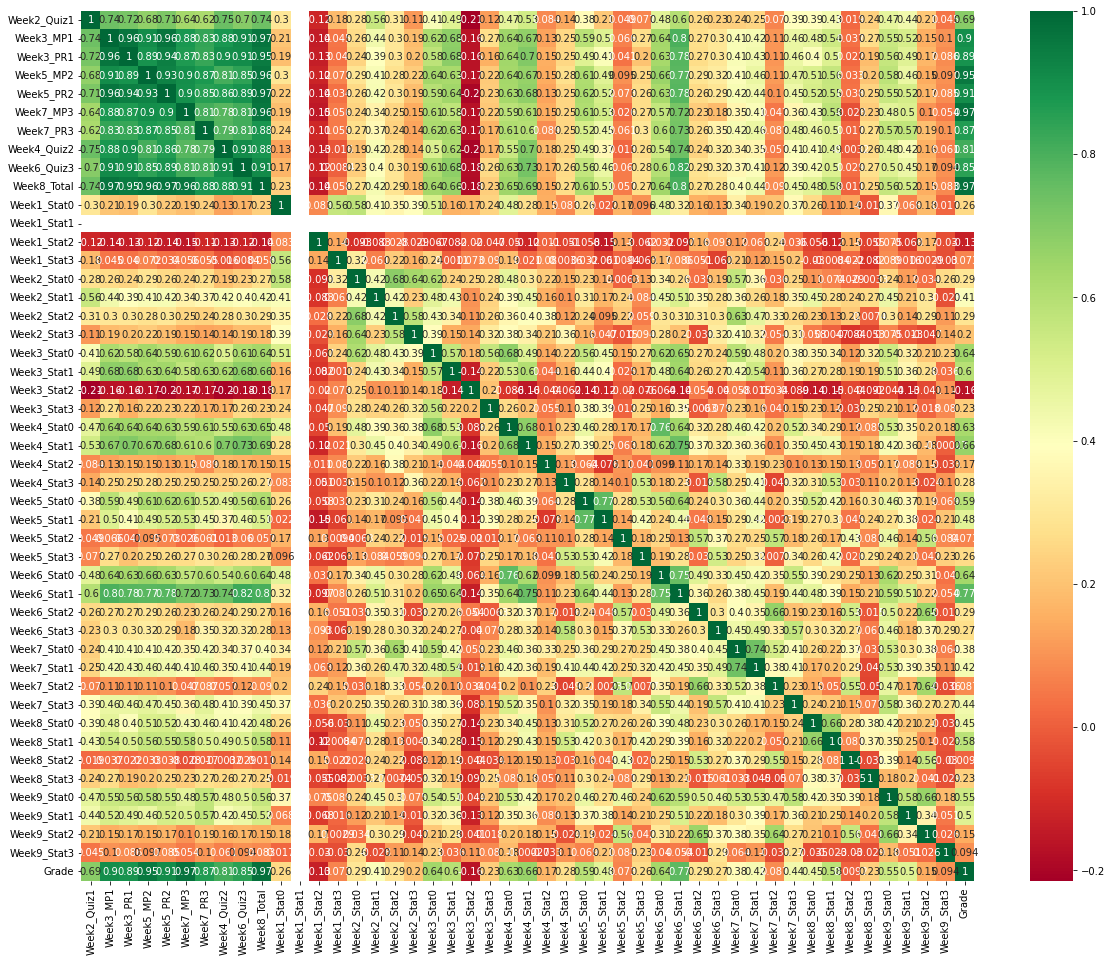

In [4]:
X = data.iloc[:,1:47]  #independent columns
y = data.iloc[:,-1]    #target column i.e Grade

# Get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))

# Plot General Heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
data.shape

(107, 48)

In [6]:
# Get Columns with low correlation, less than 0.8
drop_columns = abs(corrmat["Grade"][abs(corrmat["Grade"]) < 0.8]).index.tolist()

In [7]:
drop_columns

['Week2_Quiz1',
 'Week1_Stat0',
 'Week1_Stat2',
 'Week1_Stat3',
 'Week2_Stat0',
 'Week2_Stat1',
 'Week2_Stat2',
 'Week2_Stat3',
 'Week3_Stat0',
 'Week3_Stat1',
 'Week3_Stat2',
 'Week3_Stat3',
 'Week4_Stat0',
 'Week4_Stat1',
 'Week4_Stat2',
 'Week4_Stat3',
 'Week5_Stat0',
 'Week5_Stat1',
 'Week5_Stat2',
 'Week5_Stat3',
 'Week6_Stat0',
 'Week6_Stat1',
 'Week6_Stat2',
 'Week6_Stat3',
 'Week7_Stat0',
 'Week7_Stat1',
 'Week7_Stat2',
 'Week7_Stat3',
 'Week8_Stat0',
 'Week8_Stat1',
 'Week8_Stat2',
 'Week8_Stat3',
 'Week9_Stat0',
 'Week9_Stat1',
 'Week9_Stat2',
 'Week9_Stat3']

In [8]:
# Drop Columns of low correlation
for column in drop_columns:
  data = data.drop(column, axis='columns')

data = data.drop(['ID', 'Week1_Stat1', 'Week8_Total'], axis= 'columns')

In [9]:
data

,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,4
1,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,4
2,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,3
3,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,3
4,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,2
...,...,...,...,...,...,...,...,...,...
102,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0
103,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0
104,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0
105,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0


In [10]:
data.shape

(107, 9)

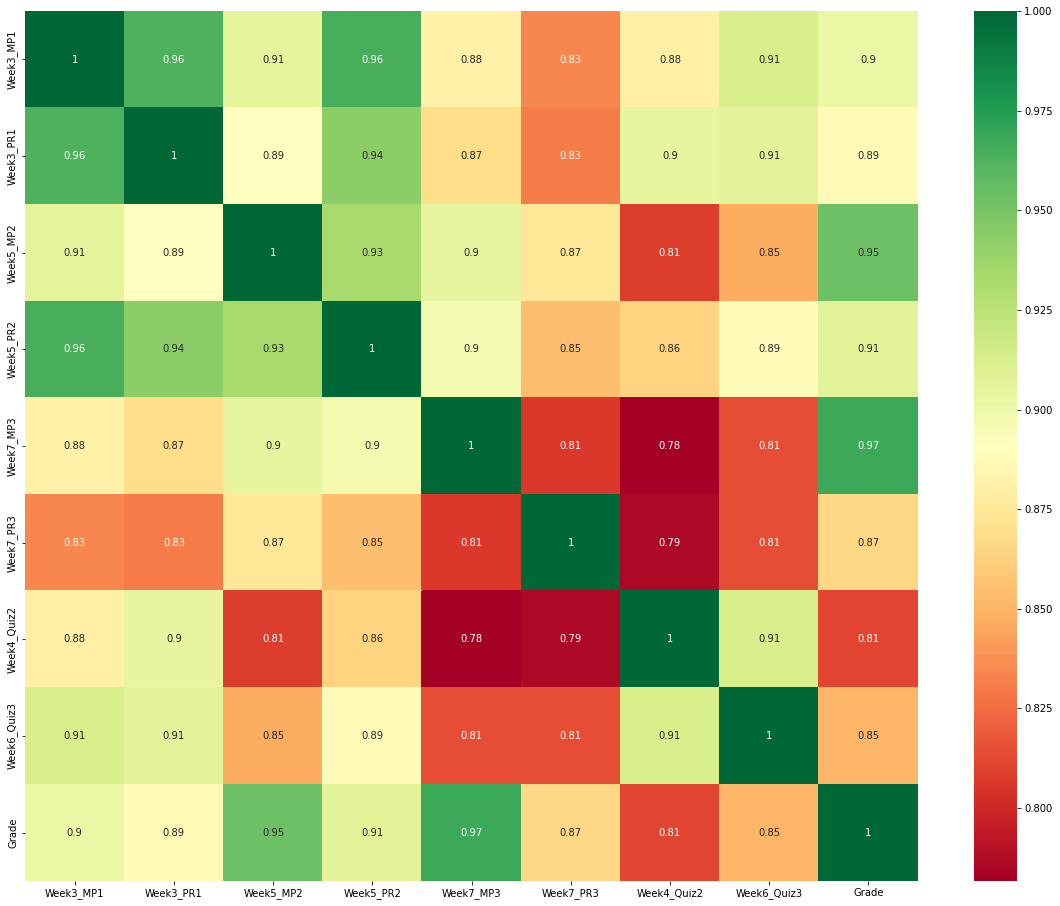

In [11]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))

# Plot New Heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Step 2 - Training and Test Dataset**

In [12]:
# Store features and target data
X = data.drop('Grade', axis='columns')
y = data.Grade

In [13]:
X

,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3
0,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0
1,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0
2,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0
3,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0
4,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0
...,...,...,...,...,...,...,...,...
102,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0
103,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0
104,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0
105,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0


In [14]:
y

0      4
1      4
2      3
3      3
4      2
      ..
102    0
103    0
104    0
105    0
106    0
Name: Grade, Length: 107, dtype: int64

In [15]:
# Divide data in 70% Train set and 30% Test set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=3)

**Step 3 - Training the models**  

1- Random Forest Classifier

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [17]:
y_predicted = model.predict(X_test)

Random Forest Performance

In [18]:
print('Accuracy = ', round(metrics.accuracy_score(y_test, y_predicted), 2))
PERFORMANCE.append(round(metrics.accuracy_score(y_test, y_predicted), 2))

Accuracy =  0.94


In [19]:
PERFORMANCE

[0.94]

In [20]:
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[15  0  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  5  0  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       0.00      0.00      0.00         1
           3       0.71      1.00      0.83         5
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00         4

    accuracy                           0.94        33
   macro avg       0.74      0.78      0.75        33
weighted avg       0.93      0.94      0.93        33



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualize The Random Forest (1 tree)

In [21]:
# Extract single tree
estimator = model.estimators_[30]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, 
                filled = True)


In [22]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Three most important features in predicting students' final grade 

[0.14221359 0.07250147 0.25766259 0.04635152 0.26791147 0.0503181
 0.0946732  0.06836806]


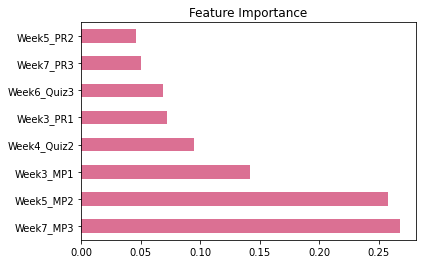

In [23]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color= 'palevioletred')
plt.title('Feature Importance')
plt.show()

2 - SVM Classifier

In [24]:
data = pd.read_csv("/content/MP2_Data.csv")

In [25]:
X = data.iloc[:,1:47]  #independent columns
y = data.iloc[:,-1]    #target column i.e Grade

# Get correlations of each features in dataset
corrmat = data.corr()

In [26]:
data.shape

(107, 48)

In [27]:
# Get Columns with low correlation, less than 0.6
drop_columns = abs(corrmat["Grade"][abs(corrmat["Grade"]) < 0.6]).index.tolist()

In [28]:
drop_columns

['Week1_Stat0',
 'Week1_Stat2',
 'Week1_Stat3',
 'Week2_Stat0',
 'Week2_Stat1',
 'Week2_Stat2',
 'Week2_Stat3',
 'Week3_Stat1',
 'Week3_Stat2',
 'Week3_Stat3',
 'Week4_Stat2',
 'Week4_Stat3',
 'Week5_Stat0',
 'Week5_Stat1',
 'Week5_Stat2',
 'Week5_Stat3',
 'Week6_Stat2',
 'Week6_Stat3',
 'Week7_Stat0',
 'Week7_Stat1',
 'Week7_Stat2',
 'Week7_Stat3',
 'Week8_Stat0',
 'Week8_Stat1',
 'Week8_Stat2',
 'Week8_Stat3',
 'Week9_Stat0',
 'Week9_Stat1',
 'Week9_Stat2',
 'Week9_Stat3']

In [29]:
# Drop Columns of low correlation
for column in drop_columns:
  data = data.drop(column, axis='columns')

data = data.drop(['ID', 'Week1_Stat1', 'Week8_Total'], axis= 'columns')

In [30]:
data

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week3_Stat0,Week4_Stat0,Week4_Stat1,Week6_Stat0,Week6_Stat1,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,30,14,39,28,30,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,100,130,16,57,22,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,25,50,19,14,20,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,79,240,27,99,19,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,27,6,15,22,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,14,16,7,11,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,10,5,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,9,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0


In [31]:
data.shape

(107, 15)

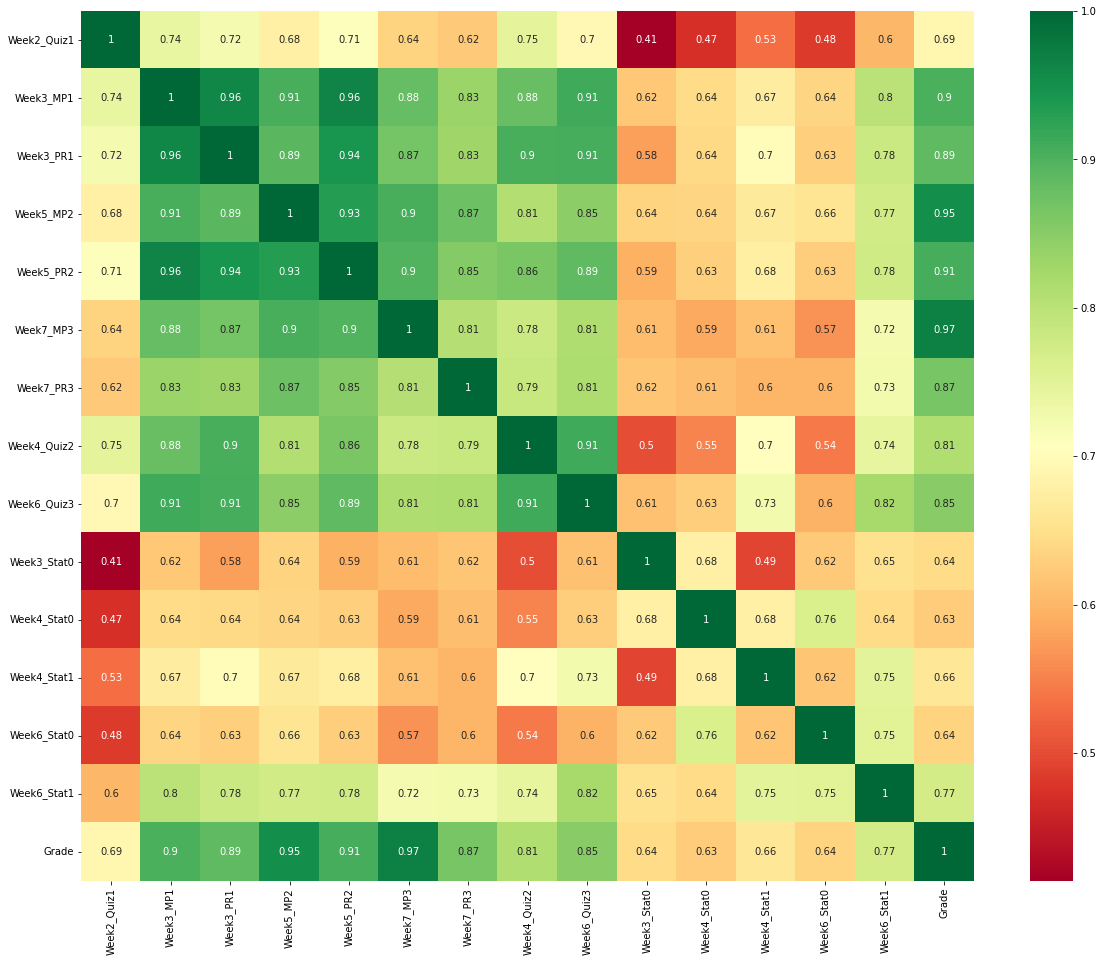

In [32]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,16))

# Plot New Heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
# Store features and target data
X = data.drop('Grade', axis='columns')
y = data.Grade

In [34]:
X

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week3_Stat0,Week4_Stat0,Week4_Stat1,Week6_Stat0,Week6_Stat1
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,30,14,39,28,30
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,100,130,16,57,22
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,25,50,19,14,20
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,79,240,27,99,19
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,27,6,15,22,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,14,16,7,11
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,10,5,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,9,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0


In [35]:
y

0      4
1      4
2      3
3      3
4      2
      ..
102    0
103    0
104    0
105    0
106    0
Name: Grade, Length: 107, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=109)

In [37]:
# Instantiate the Support Vector Classifier (SVC)
svc = svm.SVC(kernel='linear')
 
# Fit the model
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
# Make the predictions
y_predict = svc.predict(X_test)
 
# Measure the performance
print('Accuracy = ', round(metrics.accuracy_score(y_test, y_predict), 2))
PERFORMANCE.append(round(metrics.accuracy_score(y_test, y_predict), 2))

Accuracy =  0.94


In [39]:
PERFORMANCE

[0.94, 0.94]

In [40]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[18  0  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           2       1.00      0.33      0.50         3
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2

    accuracy                           0.94        33
   macro avg       0.94      0.87      0.87        33
weighted avg       0.96      0.94      0.93        33



**Step 4 – Performance Evaluation**

In [41]:
percent = []
for p in PERFORMANCE:
  percent.append(p*100)

In [42]:
percent

[94.0, 94.0]

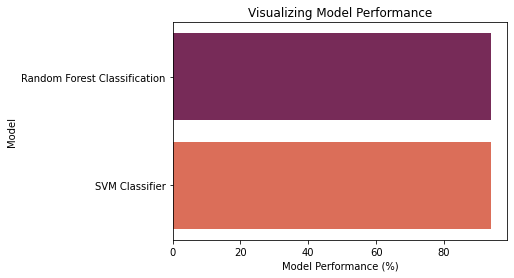

In [43]:
classifier_names = ['Random Forest Classification', 'SVM Classifier']
# Creating a bar plot
sns.barplot(x=percent, y=classifier_names, palette= 'rocket')
# Add labels to your graph
plt.xlabel('Model Performance (%)')
plt.ylabel('Model')
plt.title("Visualizing Model Performance")
plt.show()